## Introduction
In this project, we will be working with exit surveys from employees of the Department of Education, Training, and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

Questions we will investigate:

    Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
    Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

We will need to combine these two results to perform the analysis. Before we can get to the analysis we need to do some data cleaning.

Below is a preview of a couple columns we'll work with from the dete_survey.csv:

    ID: An id used to identify the participant of the survey
    SeparationType: The reason why the person's employment ended
    Cease Date: The year or month the person's employment ended
    DETE Start Date: The year the person began employment with the DETE

Below is a preview of a couple columns we'll work with from the tafe_survey.csv:

    Record ID: An id used to identify the participant of the survey
    Reason for ceasing employment: The reason why the person's employment ended
    LengthofServiceOverall. Overall Length of Service at Institute (in years): The length of the person's employment (in years)


In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
# import data
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [3]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [4]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [5]:
dete_survey['SeparationType'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64

In [6]:
dete_survey['Cease Date'].value_counts()

2012          344
2013          200
01/2014        43
12/2013        40
09/2013        34
Not Stated     34
06/2013        27
07/2013        22
10/2013        20
11/2013        16
08/2013        12
05/2013         7
05/2012         6
02/2014         2
08/2012         2
07/2014         2
04/2013         2
04/2014         2
09/2010         1
2010            1
2014            1
11/2012         1
07/2006         1
09/2014         1
07/2012         1
Name: Cease Date, dtype: int64

In [7]:
dete_survey['DETE Start Date'].value_counts().sort_index(ascending=False)

Not Stated    73
2013          21
2012          27
2011          40
2010          27
2009          24
2008          31
2007          34
2006          23
2005          20
2004          18
2003          15
2002          15
2001          10
2000          18
1999          19
1998          14
1997          14
1996          19
1995          14
1994          10
1993          13
1992          18
1991          18
1990          20
1989          17
1988          15
1987           7
1986          12
1985           8
1984          10
1983           9
1982           4
1981           9
1980          14
1979          14
1978          15
1977          11
1976          15
1975          21
1974          14
1973           8
1972          12
1971          10
1970          21
1969          10
1968           3
1967           2
1966           1
1965           1
1963           4
Name: DETE Start Date, dtype: int64

In [8]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [9]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [10]:
tafe_survey['Reason for ceasing employment'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: Reason for ceasing employment, dtype: int64

In [11]:
tafe_survey['LengthofServiceOverall. Overall Length of Service at Institute (in years)'].value_counts()

Less than 1 year      147
1-2                   102
3-4                    96
11-20                  89
More than 20 years     71
5-6                    48
7-10                   43
Name: LengthofServiceOverall. Overall Length of Service at Institute (in years), dtype: int64

#### Observations
- more columns than we need to perfom this analysis
- multiple columns/survey questions relating to job dissatisfaction; different names between two surveys
- dete_survey has answers containing 'Not Stated' showing where results are null, rather than NaN


## Identify Missing Values and Drop Unnecessary Columns

In [12]:
# read-in dete survey again, tagging Not Stated as NaN
dete_survey = pd.read_csv('dete_survey.csv', na_values = 'Not Stated')

In [13]:
# confirm updated read-in
dete_survey['DETE Start Date'].value_counts(dropna=False)

NaN        73
 2011.0    40
 2007.0    34
 2008.0    31
 2010.0    27
 2012.0    27
 2009.0    24
 2006.0    23
 1970.0    21
 1975.0    21
 2013.0    21
 2005.0    20
 1990.0    20
 1999.0    19
 1996.0    19
 1992.0    18
 1991.0    18
 2000.0    18
 2004.0    18
 1989.0    17
 1978.0    15
 2003.0    15
 1988.0    15
 1976.0    15
 2002.0    15
 1974.0    14
 1997.0    14
 1998.0    14
 1979.0    14
 1995.0    14
 1980.0    14
 1993.0    13
 1972.0    12
 1986.0    12
 1977.0    11
 1971.0    10
 1984.0    10
 1994.0    10
 1969.0    10
 2001.0    10
 1983.0     9
 1981.0     9
 1973.0     8
 1985.0     8
 1987.0     7
 1982.0     4
 1963.0     4
 1968.0     3
 1967.0     2
 1965.0     1
 1966.0     1
Name: DETE Start Date, dtype: int64

In [14]:
# drop columns we won't need
col_drop = dete_survey.columns[28:49]
dete_survey_updated = dete_survey.drop(col_drop, axis=1)

In [15]:
# confirm drop
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             788 non-null object
DETE Start Date                        749 non-null float64
Role Start Date                        724 non-null float64
Position                               817 non-null object
Classification                         455 non-null object
Region                                 717 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work envir

In [16]:
# drop tafe cols we don't need
col_drop = tafe_survey.columns[17:66]
tafe_survey_updated = tafe_survey.drop(col_drop, axis=1)

In [17]:
# confirm columns dropped
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
Record ID                                                                    702 non-null float64
Institute                                                                    702 non-null object
WorkArea                                                                     702 non-null object
CESSATION YEAR                                                               695 non-null float64
Reason for ceasing employment                                                701 non-null object
Contributing Factors. Career Move - Public Sector                            437 non-null object
Contributing Factors. Career Move - Private Sector                           437 non-null object
Contributing Factors. Career Move - Self-employment                          437 non-null object
Contributing Factors. Ill Health                                             437 non-null object
Contributing Factors

#### Notes
- I read-in dete_survey.csv again to change all the Not Stated values to NaN for easier cleaning later
- I dropped columns that are not needed for this analysis from both datasets
- tried to keep columns that explain dissatisfaction and reasons for leaving

## Clean Column Names

In [18]:
# clean dete survey column names
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(' ','_')\
                                                         .str.strip() \
                                                         .str.lower()

In [19]:
# confirm column name changes
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [20]:
# rename tafe survey column names
new_names = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date',
            'Reason for ceasing employment': 'separationtype',
            'Gender. What is your Gender?': 'gender',
            'CurrentAge. Current Age': 'age',
            'Employment Type. Employment Type': 'employment_status',
            'Classification. Classification': 'position',
            'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service'}

tafe_survey_updated.rename(columns=new_names, inplace=True)

In [21]:
# confirm rename
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='object')

In [22]:
pd.options.display.max_columns = 150
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [23]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,-,-,-,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


#### Notes
`dete_survey`
- changed all column names to lower case to make writing code easier
- removed white spaces to make writing code easier
- replaced spaces with underscores to make writing code easier

`tafe_survey`
- renamed columns to match `dete_survey` so we can combine data more easily for analysis

## Filter the Data

In [24]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [25]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [26]:
# split resignation types
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]

In [27]:
# confirm drop after -
dete_survey_updated['separationtype'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [28]:
# create resignations filter
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype']=='Resignation'].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype']=='Resignation'].copy()

### Notes
- dropped the additional description in Resignation values for dete_survey. Now all Resignation values are grouped together
- created filters to show only resignations as that is the data we are interested in analysing

## Verify the Data

In [29]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
2010         1
07/2006      1
09/2010      1
07/2012      1
Name: cease_date, dtype: int64

In [30]:
# exract year
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1].astype('float')

In [31]:
# check dete resignation dates
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [32]:
# check tafe resignation dates
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

In [33]:
# check DETE start date
dete_resignations['dete_start_date'].value_counts()

2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1982.0     1
1987.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: dete_start_date, dtype: int64

#### Notes
- `dete_resignations` doesn't contain any resignations in 2009 where as `tafe_resignations` does
- the number of resignations per year between the two datasets does not entirely agree either (in 2013, there were 55 in tafe and 146 in dete)
- we'll leave everything as-is for now as we weren't asked to analyze by year

## Create a New Column

In [34]:
# create institute_service in dete
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

In [35]:
# confirm new column
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
5,6,Resignation,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0
8,9,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0
9,10,Resignation,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0
11,12,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0


#### Notes
- created an institute_service column in the `dete_survey` in order to facilitate combining datasets for analysis

## Identifying Dissatisfied Employees

In [36]:
# check unique values
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [37]:
# check unique values
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [38]:
# create function to update value in tafe dissatisfaction columns 
# to True, False, or NaN
def update_vals(val):
    if val == '-':
        return False     
    elif pd.isnull(val):
        return np.nan 
    else:
        return True

In [39]:
# apply update_vals function to existing columns and store result in new column (tafe_resignations)
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(axis=1, skipna=False)

In [40]:
# confirm updates
tafe_resignations['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [41]:
# create copy
tafe_resignations_up = tafe_resignations.copy()

In [42]:
# apply update_vals function to existing columns and store result in new column (dete_resignation)
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction','dissatisfaction_with_the_department',
                                                       'physical_work_environment', 'lack_of_recognition',
                                                       'lack_of_job_security', 'work_location', 'employment_conditions', 
                                                       'work_life_balance', 'workload']].any(axis=1, skipna=False)


In [43]:
# confirm updates
dete_resignations['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

In [45]:
# create copy
dete_resignations_up = dete_resignations.copy()

#### Notes
- translated values in tafe_resignations & dete_resignations columns to True, False, or NaN to ease analysis across datasets in upcoming steps


## Combine the Data

In [46]:
# add value to each record noting source of values
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [49]:
# combine dataframes
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

In [50]:
# review unique values
combined.notnull().sum().sort_values()

torres_strait                                                                  0
south_sea                                                                      3
aboriginal                                                                     7
disability                                                                     8
nesb                                                                           9
business_unit                                                                 32
classification                                                               161
region                                                                       265
role_start_date                                                              271
dete_start_date                                                              283
LengthofServiceCurrent. Length of Service at current workplace (in years)    290
employment_conditions                                                        311
ill_health                  

In [51]:
# drop columns with fewer than 500 non-null values
combined_updated = combined.dropna(axis=1, thresh=500).copy()

#### Notes
- added a column to each dataset noting the source for each record
- combined datasets
- reviewed counts for each column and dropped any with fewer than 500 non-null values
- saved copy of result to combined_updated for next step

## Clean the Service Column
Now we're going to replace the years of service with some categories corresponding to career stage.
- New: less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

In [53]:
# view unique values in combined_updated
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
14.0                   6
10.0                   6
12.0                   6
17.0                   6
22.0                   6
16.0                   5
18.0                   5
24.0                   4
11.0                   4
23.0                   4
19.0                   3
39.0                   3
21.0                   3
32.0                   3
25.0                   2
26.0                   2
36.0                   2
28.0                   2
30.0                   2


In [55]:
# extract numeric values from each record into new column
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app


In [56]:
# confirm value extraction
combined_updated['institute_service_up'].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

In [59]:
# create function to map each value to a category
def categorize_service(x):
    if pd.isnull(x):
        return np.nan
    elif x < 3:
        return 'New'
    elif 3 <= x < 7:
        return 'Experienced'
    elif 7 <= x < 11:
        return 'Established'
    else:
        return 'Veteran'

In [60]:
# apply function to institute_service
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(categorize_service)

In [62]:
# confirm update
combined_updated['service_cat'].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

#### Notes
- extracted years of service from existing values
- once extracted, categorized into buckets based on total length of service

## Perform Initial Analysis

In [63]:
# confirm numbers of True and False in dissatisfied column
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [64]:
# replace Nan with most frequently occuring value
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

In [65]:
# confirm update
combined_updated['dissatisfied'].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

             dissatisfied
service_cat              
Established      0.516129
Experienced      0.343023
New              0.295337
Veteran          0.485294


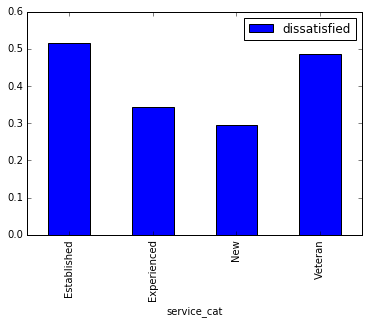

In [68]:
# calculate percentage of dissatisfied employees
dis_pct = pd.pivot_table(combined_updated, index='service_cat', values='dissatisfied')
print(dis_pct)

dis_pct.plot(kind='bar')

#### Notes
Initial analysis shows that Established and Veteran employees (those with 7 or more years of service) appear to have more dissatisfaction than employees with fewer years of experience. Further analysis will require more cleaning of the data (handling missing values)

## Next Steps
Our work here is far from done! We recommend that you continue with the following steps:

- Decide how to handle the rest of the missing values. Then, aggregate the data according to the service_cat column again. How many people in each career stage resigned due to some kind of dissatisfaction?
- Clean the age column. How many people in each age group resgined due to some kind of dissatisfaction?
- Instead of analyzing the survey results together, analyze each survey separately. Did more employees in the DETE survey or TAFE survey end their employment because they were dissatisfied in some way?
- Format your project using Dataquest's [project style guide](https://www.dataquest.io/blog/data-science-project-style-guide/).